In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
base= automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [17]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
measurement=base.classes.measurement
station=base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
session.query(func.max(measurement.date)).one()

('2017-08-23',)

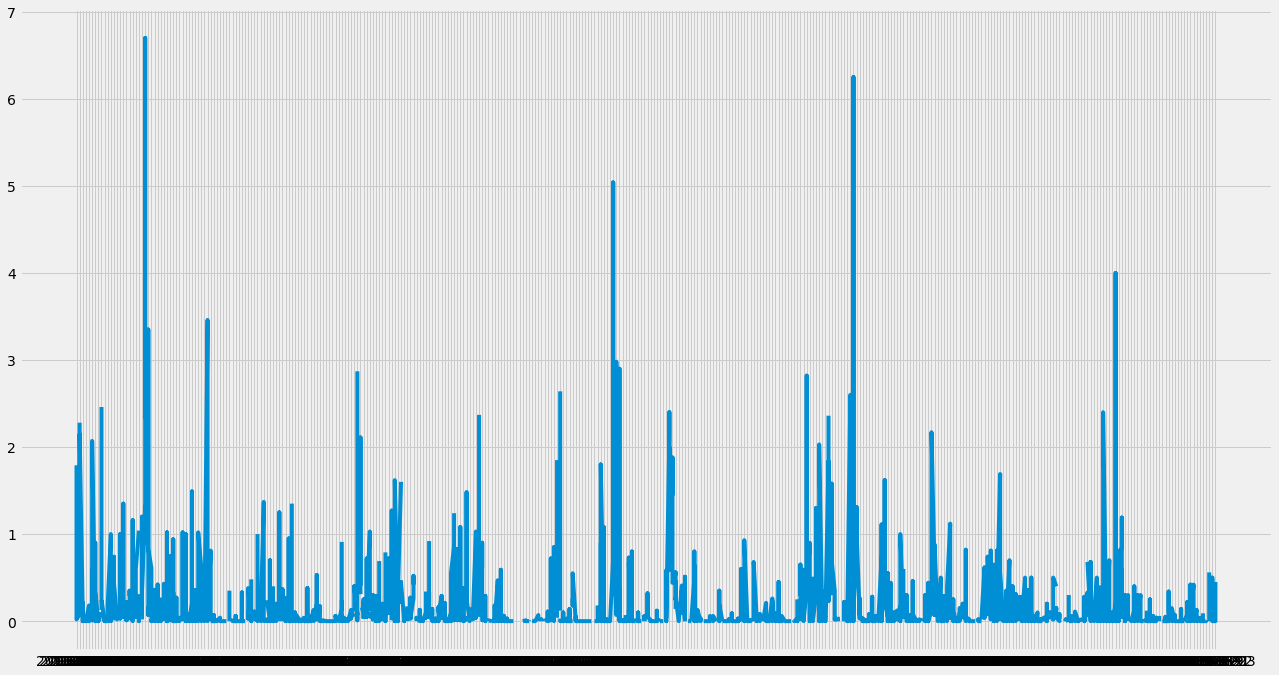

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
scores=session.query(measurement.date, measurement.prcp).\
    filter(measurement.date>='2016-08-23')

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(scores)

# Sort the dataframe by date
sort=df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20,11))
plt.plot(sort['date'],sort['prcp'])
plt.grid(visible=True)
plt.show()


In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(measurement.station)).all()
unique= session.query(measurement).group_by(measurement.station)
print(unique.count())

9


In [62]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).all()


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats=session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs), func.count(measurement.tobs)).\
    filter(measurement.station=='USC00519281')
stats.all()

[(54.0, 85.0, 71.66378066378067, 2772)]

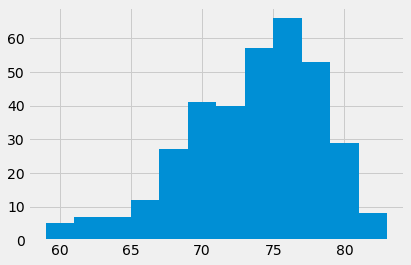

In [77]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
largest_station=session.query(measurement.tobs, measurement.date).filter(measurement.station=='USC00519281').\
    filter(measurement.date>='2016-08-23').all()
ls=pd.DataFrame(largest_station)
ls
plt.hist(ls['tobs'],bins=12)
plt.show()


# Close session

In [78]:
# Close Session
session.close()